<a href="https://colab.research.google.com/github/ateffal/Kaggle_competitions/blob/master/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Scanned text document to text**#

In [0]:
from skimage import data, io, filters
from skimage.color import rgb2gray
from skimage import exposure
from skimage.feature import match_template
from skimage.measure import find_contours
from skimage.draw import line
import numpy as np

This function detects the lines of text in the documents. It is assumed that the lines are perfectly horizontal ! 

In [0]:
def detect_lines(img, nb_white_pix = 10):
    """Detects lines of text in the scanned document.
  
    Args:
      img: numpy object representing the scanned document 
      nb_white_pix: minimum number of white lines separating two lines of text
    Returns:
      Tuple (img, line_indices): image with marked lines 
                                 and indices of lines of text
    """
    h = img.shape[0]
    w = img.shape[1]
    nb_white_line = 0
    found = False
    line_indices = set()

    i_start = 0

    for i in range(h):
        if found == True:            
            i_start = i
    
        found = False
        # print("nb_white_line = ", nb_white_line, "i = ",i)
        for j in range(w):
            if img[i,j] == 0:
                nb_white_line = 0
                found = True
                break

        if found == False:    
            nb_white_line = nb_white_line +1
            if nb_white_line >= nb_white_pix:
                # draw line
                # rr, cc = line(i, 0, i, w)
                # img[(i-nb_white_line):i,0:w] = 0
                line_indices.add(i_start)
                img[i_start,0:w] = 0
                nb_white_line = 0
        if i==(h-1) and found == False:
            img[i,0:w] = 0
            line_indices.add(i)

    line_indices = list(line_indices)
    line_indices.sort()
    return img, line_indices

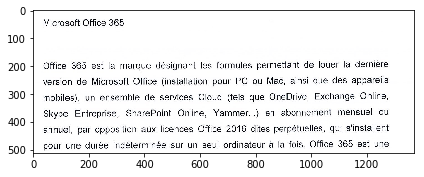

In [11]:
# read the image document
image_par = io.imread("paragraphe_2.jpg")
io.imshow(image_par)
io.show()

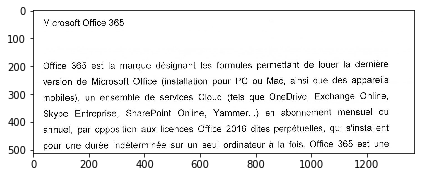

In [8]:
image = image_par_1[:,:,0]
io.imshow(image)
io.show()

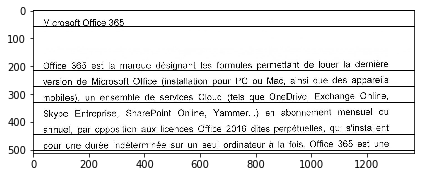

In [12]:
# detect lines of text and mark them in the image
x,li = detect_lines(image, 3)
io.imsave("res2.jpg",x)
io.imshow(x)
io.show()